[*********************100%***********************]  1 of 1 completed

Selected Technical Indicators: ['20MA', '50MA', '200MA', 'MACD', 'Signal_Line']
Hyperparameters:
Filters: 32, Kernel Size: 3, Learning Rate: 0.001
Batch Size: 16, Epochs: 100, Optimizer: adam


Removed 0 rows corresponding to ex-dividend and earnings dates.
Null values in each column:
 Price        Ticker
Close        XOM       0
High         XOM       0
Low          XOM       0
Open         XOM       0
Volume       XOM       0
20MA                   0
50MA                   0
200MA                  0
RSI                    0
12EMA                  0
26EMA                  0
MACD                   0
Signal_Line            0
Upper_BB               0
Lower_BB               0
CCI                    0
ATR                    0
ROC                    0
Williams_%R            0
OBV                    0
dtype: int64
Does the dataset contain any null values? False

Running model - Trial 1


2025-05-11 18:40:21.527872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-05-11 18:40:21.612892: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-11 18:40:21.612946: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 21522 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2025-05-11 18:40:22.487722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-05-11 18:40:22.515184: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to

Trial 1 Accuracy (±5%): 72.52%

Running model - Trial 2


2025-05-11 18:40:53.509191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-05-11 18:40:53.577891: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-11 18:40:53.577951: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 21522 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2025-05-11 18:40:54.611671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-05-11 18:40:54.634962: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to

Trial 2 Accuracy (±5%): 72.52%

Running model - Trial 3


2025-05-11 18:41:30.524441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-05-11 18:41:30.584100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-11 18:41:30.584161: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 21522 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2025-05-11 18:41:31.529387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-05-11 18:41:31.552592: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to

Trial 3 Accuracy (±5%): 72.52%

All Accuracies: [72.5179856115108, 72.5179856115108, 72.5179856115108]
Mean Accuracy: 72.52% | Std Dev: 0.00%


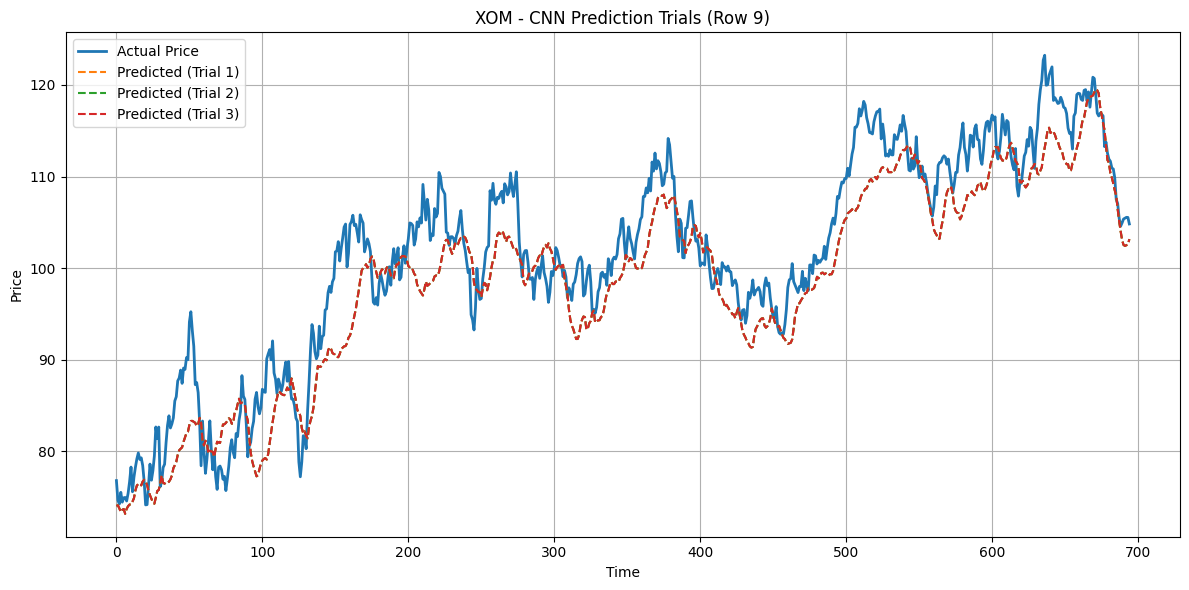

In [43]:
import os

# Enforce full reproducibility
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU execution
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'

import tensorflow as tf
tf.random.set_seed(42)

# Optional: force single-threaded TensorFlow ops
# tf.config.threading.set_inter_op_parallelism_threads(1)
# tf.config.threading.set_intra_op_parallelism_threads(1)

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotUniform
from ReusableFunctions.DataPreprocessing import DataPreprocessing
import matplotlib.pyplot as plt

# Load the CSV and extract hyperparameters
csv_path = "stock_results/XOM_results_CNN.csv"
row_number = 9
df_results = pd.read_csv(csv_path)
row = df_results.iloc[row_number]

selected_indicators = row["Indicators"].split(", ")
ticker = row["Ticker"]
filters = int(row["Filters"])
kernel_size = int(row["Kernel Size"])
dropout_rate = float(row["Dropout Rate"])  # Ignored now
learning_rate = float(row["Learning Rate"])
batch_size = int(row["Batch Size"])
epochs = int(row["Epochs"])
optimizer_type = row["Optimizer"]

print("Selected Technical Indicators:", selected_indicators)
print("Hyperparameters:")
print(f"Filters: {filters}, Kernel Size: {kernel_size}, Learning Rate: {learning_rate}")
print(f"Batch Size: {batch_size}, Epochs: {epochs}, Optimizer: {optimizer_type}")

# Load and preprocess data
data_preprocessing = DataPreprocessing(ticker=ticker)
df = data_preprocessing.add_technical_indicators()

features = ["Close"] + selected_indicators
scaler_X = MinMaxScaler()
scaled_data = scaler_X.fit_transform(df[features])
scaler_y = MinMaxScaler()
close_scaled = scaler_y.fit_transform(df["Close"].values.reshape(-1, 1))

def create_time_series(X, y, window_size=50):
    X_out, y_out = [], []
    for i in range(window_size, len(X)):
        X_out.append(X[i-window_size:i])
        y_out.append(y[i])
    return np.array(X_out), np.array(y_out)

X_all, y_all = create_time_series(scaled_data, df["Close"].values)
X_train_size = int(len(X_all) * 0.7)
X_val_size = int(len(X_all) * 0.1)

X_train, X_val, X_test = (
    X_all[:X_train_size],
    X_all[X_train_size:X_train_size+X_val_size],
    X_all[X_train_size+X_val_size:]
)
y_train, y_val, y_test = (
    y_all[:X_train_size],
    y_all[X_train_size:X_train_size+X_val_size],
    y_all[X_train_size+X_val_size:]
)

y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

input_shape = (X_train.shape[1], X_train.shape[2])

def calculate_accuracy(y_true, y_pred, threshold_percent=5):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    percentage_diff = np.abs((y_pred - y_true) / y_true) * 100
    return np.mean(percentage_diff <= threshold_percent) * 100

# Run model multiple times to check consistency
num_runs = 3
accuracies = []
all_predictions = []

for run in range(num_runs):
    print(f"\nRunning model - Trial {run + 1}")

    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu',
               kernel_initializer=GlorotUniform(seed=42), input_shape=input_shape),
        #Due to this being used for validation , dropout will be removed
        MaxPooling1D(pool_size=4),
        Flatten(),
        Dense(1, kernel_initializer=GlorotUniform(seed=42))
    ])

    optimizer = Adam(learning_rate=learning_rate) if optimizer_type == 'adam' else RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(
        X_train, y_train_scaled,
        validation_data=(X_val, y_val_scaled),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0,
        callbacks=[early_stopping]
    )

    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test_actual = scaler_y.inverse_transform(y_test_scaled)

    accuracy = calculate_accuracy(y_test_actual, y_pred)
    accuracies.append(accuracy)
    all_predictions.append(y_pred)

    print(f"Trial {run + 1} Accuracy (±5%): {accuracy:.2f}%")

# Report final results
print("\nAll Accuracies:", accuracies)
print(f"Mean Accuracy: {np.mean(accuracies):.2f}% | Std Dev: {np.std(accuracies):.2f}%")

# Plot all runs
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price', linewidth=2)

for i, preds in enumerate(all_predictions):
    plt.plot(preds, label=f'Predicted (Trial {i+1})', linestyle='--')

plt.title(f"{ticker} - CNN Prediction Trials (Row {row_number})")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
